In [24]:
%load_ext autoreload
%autoreload 2


import pandas as pd
import numpy as np
import random
import gymnasium as gym
from tqdm import tqdm
from collections import deque
import os
import matplotlib.pyplot as plt
from dyna import DynaAgent, train
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
env = gym.make('MountainCar-v0')
model_path = 'dyna_model/'
dyna = DynaAgent(env, discr_step=[0.025, 0.005], path=model_path)
train(env, dyna, n_episodes=3000)

  0%|          | 2/3000 [00:00<03:26, 14.49it/s]

Episode 0 - Reward: -200.0 - Qvalue step: -129.54211083968485 - Duration: 200


 10%|█         | 305/3000 [00:13<01:55, 23.28it/s]

Episode 300 - Reward: -200.0 - Qvalue step: -125.01655634107112 - Duration: 200


 20%|██        | 603/3000 [00:25<01:35, 24.98it/s]

Episode 600 - Reward: -190.0 - Qvalue step: -56.75295211177744 - Duration: 190


 30%|███       | 902/3000 [00:35<01:23, 25.20it/s]

Episode 900 - Reward: -114.0 - Qvalue step: -5.515192332249152 - Duration: 114


 40%|████      | 1204/3000 [00:45<00:55, 32.57it/s]

Episode 1200 - Reward: -149.0 - Qvalue step: -17.763921600197758 - Duration: 149


 50%|█████     | 1506/3000 [00:54<00:48, 30.85it/s]

Episode 1500 - Reward: -108.0 - Qvalue step: -0.23354469727007343 - Duration: 108


 60%|██████    | 1804/3000 [01:03<00:37, 32.19it/s]

Episode 1800 - Reward: -107.0 - Qvalue step: -0.5436848907376399 - Duration: 107


 70%|███████   | 2104/3000 [01:11<00:26, 33.44it/s]

Episode 2100 - Reward: -108.0 - Qvalue step: -0.5540480006744608 - Duration: 108


 80%|████████  | 2404/3000 [01:20<00:17, 33.42it/s]

Episode 2400 - Reward: -108.0 - Qvalue step: -0.5061543594200231 - Duration: 108


 90%|█████████ | 2706/3000 [01:28<00:08, 33.73it/s]

Episode 2700 - Reward: -152.0 - Qvalue step: -14.554501250486998 - Duration: 152


100%|██████████| 3000/3000 [01:37<00:00, 30.87it/s]

Episode 2999 - Reward: -89.0 - Qvalue step: -0.27951828778299825 - Duration: 89


array([<Axes: xlabel='episode'>, <Axes: xlabel='episode'>,
       <Axes: xlabel='episode'>], dtype=object)

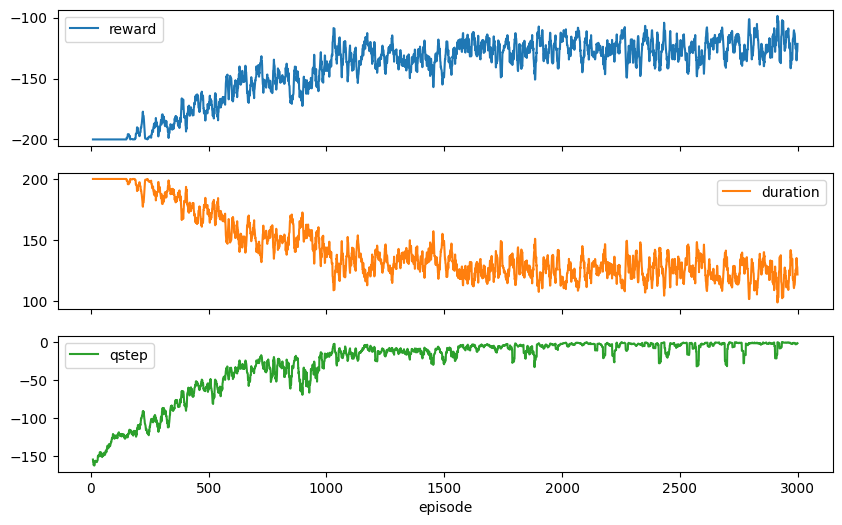

In [26]:
df = pd.read_csv(f'{model_path}episode_results.csv', index_col='episode')
df.rolling(window=10).mean().plot(subplots=True, figsize=(10, 6))

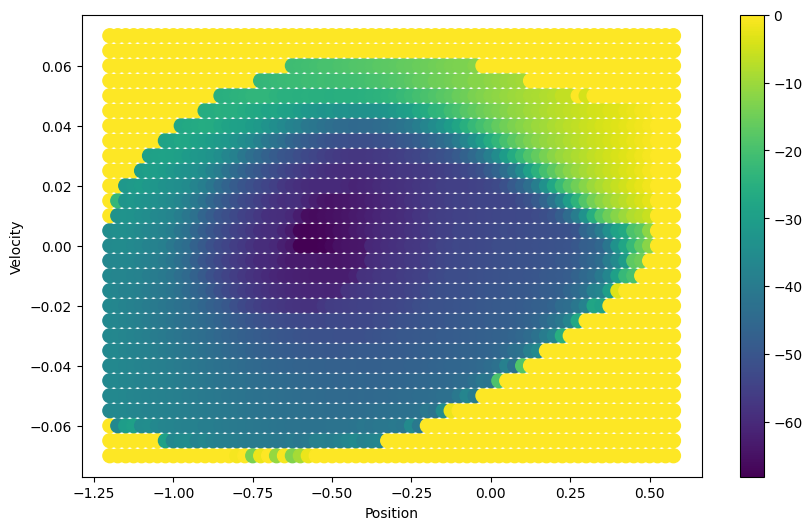

In [27]:
def plot_qvalues(model_path, dyna):
    qvalues_path = os.path.join(model_path, 'Q.npy')
    qvalues = np.load(qvalues_path)
    # qvalues[qvalues == 0] = np.nan

    n_positions = len(dyna.positions)
    n_velocities = len(dyna.velocities)

    X, Y = np.meshgrid(dyna.positions, dyna.velocities, indexing='ij')
    Z = qvalues.max(axis=-1).reshape(n_positions, n_velocities)

# Scatter plot of Q-values with colorbar
    fig, ax = plt.subplots(figsize=(10, 6))
    sc = ax.scatter(X, Y, c=Z, s=100)
    plt.colorbar(sc)
    ax.set_xlabel('Position')
    ax.set_ylabel('Velocity')
    plt.show()

# Heatmap of Q-values
    # fig, ax = plt.subplots(figsize=(10, 6))
    # plt.imshow(Z, extent=(min(dyna.positions), max(dyna.positions), 
                      # min(dyna.velocities), max(dyna.velocities)), 
                    # aspect='auto', origin='lower', interpolation='bicubic')
    # plt.colorbar()
    # ax.set_xlabel('Position')
    # ax.set_ylabel('Velocity')
    # plt.show()

plot_qvalues(model_path, dyna)

## Run Dyna with large bins

In [28]:
env = gym.make('MountainCar-v0')
model_path_large = 'dyna_model_large_bins/'
dyna_large = DynaAgent(env, discr_step=[0.05, 0.01], path=model_path_large)
train(env, dyna_large, n_episodes=3000)

  0%|          | 5/3000 [00:00<01:03, 47.05it/s]

Episode 0 - Reward: -200.0 - Qvalue step: -77.69206714142575 - Duration: 200


 10%|█         | 307/3000 [00:05<00:42, 62.90it/s]

Episode 300 - Reward: -200.0 - Qvalue step: -78.81982781207381 - Duration: 200


 20%|██        | 610/3000 [00:10<00:33, 71.15it/s]

Episode 600 - Reward: -112.0 - Qvalue step: -3.5286433218690156 - Duration: 112


 30%|███       | 909/3000 [00:14<00:29, 70.83it/s]

Episode 900 - Reward: -116.0 - Qvalue step: 2.2770743623618457 - Duration: 116


 40%|████      | 1214/3000 [00:18<00:25, 70.49it/s]

Episode 1200 - Reward: -113.0 - Qvalue step: -5.767285361405575 - Duration: 113


 50%|█████     | 1511/3000 [00:22<00:21, 68.55it/s]

Episode 1500 - Reward: -169.0 - Qvalue step: 2.0154048458013145 - Duration: 169


 60%|██████    | 1811/3000 [00:26<00:16, 70.55it/s]

Episode 1800 - Reward: -111.0 - Qvalue step: 1.8154200475438858 - Duration: 111


 70%|███████   | 2110/3000 [00:31<00:12, 70.86it/s]

Episode 2100 - Reward: -148.0 - Qvalue step: -0.011879164985053148 - Duration: 148


 80%|████████  | 2415/3000 [00:35<00:07, 79.72it/s]

Episode 2400 - Reward: -110.0 - Qvalue step: 0.5388030154183348 - Duration: 110


 90%|█████████ | 2708/3000 [00:39<00:04, 67.99it/s]

Episode 2700 - Reward: -150.0 - Qvalue step: 0.13425967386738047 - Duration: 150


100%|██████████| 3000/3000 [00:42<00:00, 69.87it/s]

Episode 2999 - Reward: -116.0 - Qvalue step: 0.039101382513948124 - Duration: 116


array([<Axes: xlabel='episode'>, <Axes: xlabel='episode'>,
       <Axes: xlabel='episode'>], dtype=object)

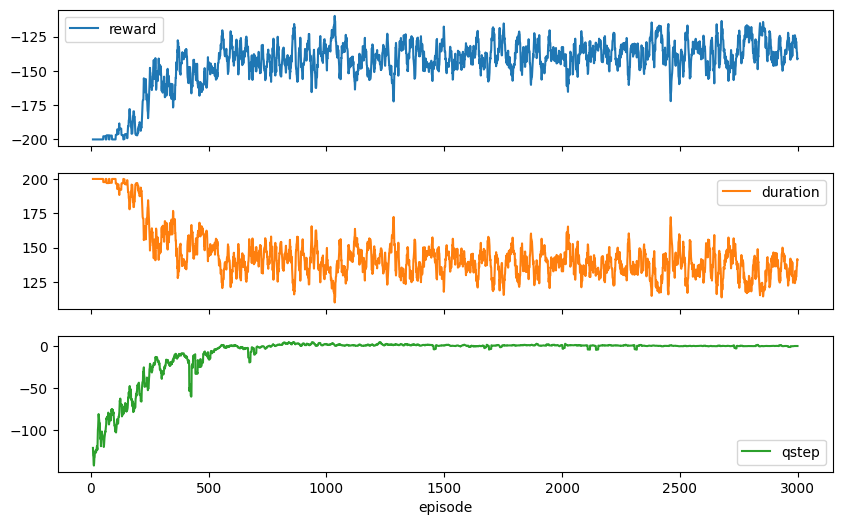

In [29]:
df_large = pd.read_csv(f'{model_path_large}episode_results.csv', index_col='episode')
df_large.rolling(window=10).mean().plot(subplots=True, figsize=(10, 6))

## Run Dyna with small bins

In [30]:
env = gym.make('MountainCar-v0')
model_path_small = 'dyna_model_small_bins/'
dyna_small = DynaAgent(env, discr_step=[0.0125, 0.025], path=model_path_small)
train(env, dyna_small, n_episodes=3000)

  0%|          | 8/3000 [00:00<01:23, 35.72it/s]

Episode 0 - Reward: -200.0 - Qvalue step: -117.42030683809172 - Duration: 200


 10%|█         | 307/3000 [00:07<01:06, 40.53it/s]

Episode 300 - Reward: -200.0 - Qvalue step: -142.31332382259106 - Duration: 200


 20%|██        | 607/3000 [00:14<00:53, 44.51it/s]

Episode 600 - Reward: -200.0 - Qvalue step: -9.834726641068137 - Duration: 200


 30%|███       | 909/3000 [00:21<00:43, 48.21it/s]

Episode 900 - Reward: -152.0 - Qvalue step: 5.87653956040055 - Duration: 152


 40%|████      | 1209/3000 [00:27<00:36, 48.71it/s]

Episode 1200 - Reward: -149.0 - Qvalue step: 11.350081236815743 - Duration: 149


 50%|█████     | 1509/3000 [00:33<00:31, 47.99it/s]

Episode 1500 - Reward: -155.0 - Qvalue step: 1.8274359045502409 - Duration: 155


 60%|██████    | 1809/3000 [00:40<00:25, 46.69it/s]

Episode 1800 - Reward: -161.0 - Qvalue step: 9.507286484888933 - Duration: 161


 70%|███████   | 2107/3000 [00:46<00:18, 48.78it/s]

Episode 2100 - Reward: -154.0 - Qvalue step: 1.3101001871957574 - Duration: 154


 80%|████████  | 2407/3000 [00:52<00:12, 47.53it/s]

Episode 2400 - Reward: -147.0 - Qvalue step: 0.043363899209102996 - Duration: 147


 90%|█████████ | 2709/3000 [00:58<00:06, 46.25it/s]

Episode 2700 - Reward: -158.0 - Qvalue step: 0.8785507423699481 - Duration: 158


100%|██████████| 3000/3000 [01:04<00:00, 46.32it/s]

Episode 2999 - Reward: -177.0 - Qvalue step: -52.80286892995904 - Duration: 177


array([<Axes: xlabel='episode'>, <Axes: xlabel='episode'>,
       <Axes: xlabel='episode'>], dtype=object)

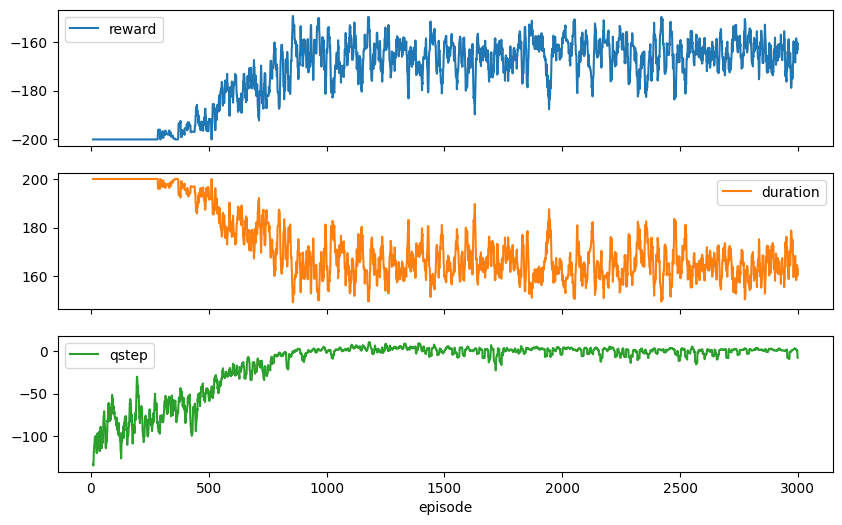

In [31]:
df_small = pd.read_csv(f'{model_path_small}episode_results.csv', index_col='episode')
df_small.rolling(window=10).mean().plot(subplots=True, figsize=(10, 6))

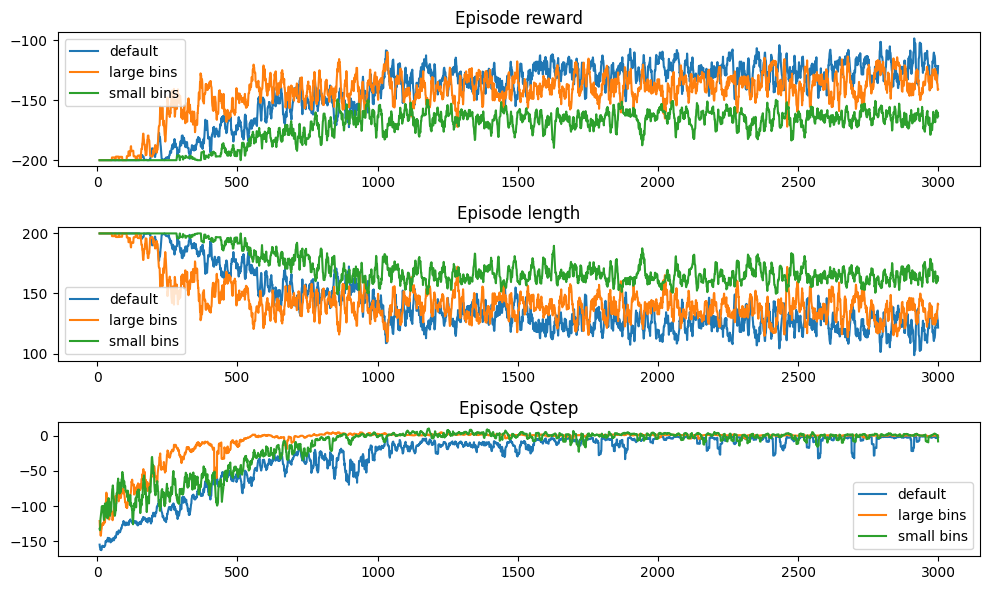

In [32]:
fig, axes = plt.subplots(3, 1, figsize=(10, 6))
titles = ['Episode reward', 'Episode length', 'Episode Qstep']
for i, (cols, ax) in enumerate(zip(df.columns, axes)):
    ax.plot(df[cols].rolling(window=10).mean(), label='default')
    ax.plot(df_large[cols].rolling(window=10).mean(), label='large bins')
    ax.plot(df_small[cols].rolling(window=10).mean(), label='small bins')
    ax.set_title(titles[i])
    ax.legend()
plt.tight_layout()
plt.show()    